### Loading essential libraries

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlsxwriter

### ICO (*International Coffee Organization*) website data preprocessing in Coffee production category

In [7]:
# List of excel data available in from ICO website (https://www.ico.org/new_historical.asp)

url_list = ["https://www.ico.org/historical/1990%20onwards/Excel/1a%20-%20Total%20production.xlsx",
            "https://www.ico.org/historical/1990%20onwards/Excel/1b%20-%20Domestic%20consumption.xlsx",
            "https://www.ico.org/historical/1990%20onwards/Excel/2a%20-%20Exports%20-%20calendar%20year.xlsx",
            "https://www.ico.org/historical/1990%20onwards/Excel/2b%20-%20Imports.xlsx",
            "https://www.ico.org/historical/1990%20onwards/Excel/2c%20-%20Re-exports.xlsx",
            "https://www.ico.org/historical/1990%20onwards/Excel/4a%20-%20Inventories.xlsx",
            "https://www.ico.org/historical/1990%20onwards/Excel/4b%20-%20Disappearance.xlsx"]

### Raw data download function from ICO website

In [8]:
# Function for data extraction and save each excel file as dataframe

df_list = []

def data_loading(url):
    """
    Data extraction function from website excel file.
    
    Parameter:
        - url: urls available from ICO website
    Returns:
        Separate DataFrame with data extracted from url parameter
    """
    
    for i in url:
        df = pd.read_excel(i, header=3)
        df_list.append(df)
        
data_loading(url_list)

# Pack each of excel data into dataframe

df_production = df_list[0]
df_domestic_consumption = df_list[1]
df_export = df_list[2]
df_import = df_list[3]
df_re_export = df_list[4]
df_inventorie = df_list[5]
df_import_consumption = df_list[6]

C:\Users\dell\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\dell\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Function of preprocessing data into usable form

#### Df_production preprocesing

In [9]:
# Function for data preprocessing (cleaning, value change, deduplication, droping rows and values)

def data_production_preprocesing(*args):
    """
     Data preprocesing function for df_production
    
    Returns:
        Clean version of df_production DataFrame
    """
    global df_production
    
    # Data preprocesing, variable rename
    df_production = df_production.rename(columns={"Unnamed: 1" : "Coffee type", "Crop year" : "Country"})
    df_production["Coffee type"].value_counts()
    df_production["Coffee type"].replace({"(A)" : "Arabica", "(R)" : "Robusta", "(R/A)" : "Robusta/Arabica",
                           "(A/R)" : "Arabica/Robusta", 0 : "Arabica"}, inplace=True)
    df_production.dropna(how='all', inplace=True)
    df_production['Coffee type'].isna()
    df_production.drop(index=[1, 17, 26, 62, 63], axis=0, inplace=True)
    df_production.reset_index(drop=True)
    
    # Rounding numeric values
    df_production_1 = df_production.iloc[:, 2:32]
    df_production_1.reset_index(drop=True)
    df_production_2 = df_production.iloc[:, 0:2]
    df_production_2.reset_index(drop=True)
    
    df_production_1 = df_production_1.apply(lambda x : round(x, 0))
    
    # In order to obtain kg values, data have to be multiplaying by 60 kg coffee bags, and 1 000 value
    df_production_1 = df_production_1.apply(lambda x : x * 1000)
    df_production_1 = df_production_1.apply(lambda x : x * 60)
    
    df_production = pd.concat([df_production_2, df_production_1], axis=1).reset_index(drop=True)
    
    # Total consumption
    df_production['Total_production'] = df_production.iloc[:, 2:33].sum(axis=1)
    
    return df_production

df_production = data_production_preprocesing()

In [10]:
df_production.head(5)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,...,1.740000e+06,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06,8.208000e+07
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,...,7.920000e+06,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06,2.070000e+08
2,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
3,Burundi,Arabica/Robusta,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,...,1.224000e+07,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07,6.236400e+08
4,Ecuador,Arabica/Robusta,9.024000e+07,1.274400e+08,7.110000e+07,1.241400e+08,1.425600e+08,1.132800e+08,1.195800e+08,7.146000e+07,...,4.950000e+07,4.968000e+07,3.996000e+07,3.864000e+07,3.864000e+07,3.870000e+07,3.744000e+07,2.976000e+07,3.354000e+07,1.900380e+09


#### Df_domestic_consumption preprocesing

In [11]:
def data_domestic_consumption_preprocesing(*args):
    """
     Data preprocesing function for df_domestic_consumption
    
    Returns:
        Clean version of df_domestic_consumption DataFrame
    """
    global df_domestic_consumption
    
    # Data preprocesing, variable rename
    df_domestic_consumption = df_domestic_consumption.rename(columns={"Unnamed: 1" : "Coffee type", "Crop year" : "Country"})
    df_domestic_consumption["Coffee type"].value_counts()
    df_domestic_consumption["Coffee type"].replace({"(A)" : "Arabica", "(R)" : "Robusta", "(R/A)" : "Robusta/Arabica",
                           "(A/R)" : "Arabica/Robusta"}, inplace=True)
    df_domestic_consumption["Coffee type"].value_counts()
    df_domestic_consumption.dropna(how='all', inplace=True)
    df_domestic_consumption['Coffee type'].isna()
    df_domestic_consumption.drop(index=[1, 17, 26, 62, 63], axis=0, inplace=True)
    df_domestic_consumption.reset_index(drop=True)
    
    # Rounding numeric values
    df_domestic_consumption_1 = df_domestic_consumption.iloc[:, 2:32]
    df_domestic_consumption_1.reset_index(drop=True)
    df_domestic_consumption_2 = df_domestic_consumption.iloc[:, 0:2]
    df_domestic_consumption_2.reset_index(drop=True)
    
    # In order to obtain kg values, data have to be multiplaying by 60 kg coffee bags and 1 000 value
    df_domestic_consumption_1 = df_domestic_consumption_1.apply(lambda x : x * 1000)
    df_domestic_consumption_1 = df_domestic_consumption_1.apply(lambda x : x * 60)
    
    # Data type change from float to integer
    df_domestic_consumption_1[[col for col in df_domestic_consumption_1.columns if df_domestic_consumption_1[col].dtypes == float]] = \
    df_domestic_consumption_1[[col for col in df_domestic_consumption_1.columns if df_domestic_consumption_1[col].dtypes == float]].astype(int)
    df_domestic_consumption = pd.concat([df_domestic_consumption_2, df_domestic_consumption_1], axis=1).reset_index(drop=True)
    
    # Total consumption
    df_domestic_consumption['Total_domestic_consumption'] = df_domestic_consumption.iloc[:, 2:33].sum(axis=1)
    
    return df_domestic_consumption

df_domestic_consumption = data_domestic_consumption_preprocesing()

In [12]:
df_domestic_consumption.head(5)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


#### Df_export preprocesing

In [13]:
def data_export_preprocesing(*args):
    """
    Data preprocesing function for df_export
    
    Returns:
        Clean version of df_export DataFrame
    """
    
    global df_export
    
    # Data preprocesing, variable rename
    
    df_export = df_export.rename(columns={"Calendar years" : "Country"})
    df_export.dropna(how='all', inplace=True)
    df_export.drop(index=[56, 57], axis=0, inplace=True)
    df_export.reset_index(drop=True)

    # Rounding numeric values (values are expressed in thousand 60 kg bags)
    df_export_1 = df_export.iloc[:, 1:]
    df_export_1.reset_index(drop=True, inplace=True)
    df_export_2 = df_export.iloc[:, 0]
    df_export_2.reset_index(drop=True, inplace=True)
    
    # Data are round into whole numbers
    df_export_1 = df_export_1.apply(lambda x : round(x, 0))
    
    # In order to obtain aggregate weight in KG unit, data have to be multiplaying by 60 kg coffee bags and 1 000 value
    df_export_1 = df_export_1.apply(lambda x : x * 1000)
    df_export_1 = df_export_1.apply(lambda x : x * 60)

    # Data type change from float to integer
    df_export_1[[col for col in df_export_1.columns if df_export_1[col].dtypes == float]] = \
    df_export_1[[col for col in df_export_1.columns if df_export_1[col].dtypes == float]].astype(int)

    df_export = pd.concat([df_export_2, df_export_1], axis=1).reset_index(drop=True)
    
    # Total export
    df_export['Total_export'] = df_export.iloc[:, 1:].sum(axis=1)
    
    return df_export

df_export = data_export_preprocesing()

In [14]:
df_export.head(5)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
0,Angola,5040000,4260000,4800000,2340000,480000,2460000,3120000,3000000,3240000,...,480000,480000,360000,540000,660000,660000,540000,540000,1380000,43320000
1,Bolivia (Plurinational State of),9360000,4440000,5760000,2820000,5040000,5640000,7380000,6660000,5820000,...,4440000,3780000,3300000,3720000,1800000,1320000,1560000,1320000,1200000,137460000
2,Brazil,1016160000,1270980000,1127460000,1070280000,1036380000,868080000,915060000,1008060000,1088640000,...,2028360000,1712940000,1899060000,-2147483648,-2147483648,2056140000,1855500000,2138220000,-2147483648,33807709056
3,Burundi,35100000,41280000,38760000,25080000,30480000,31680000,13440000,31740000,22440000,...,13080000,23520000,11700000,15120000,13800000,12240000,10140000,12120000,17580000,646200000
4,Cameroon,156660000,105120000,98760000,42300000,32760000,24420000,33840000,82080000,44760000,...,29400000,37320000,16320000,22500000,23400000,16860000,14700000,17220000,15000000,1399920000


#### Df_import preprocesing

In [15]:
def data_import_preprocesing(*args):
    """
    Data preprocesing function for df_import
    
    Returns:
        Clean version of df_import DataFrame
    """
    
    global df_import
    
    # Data preprocesing, variable rename
    
    df_import = df_import.rename(columns={"Calendar years" : "Country"})
    df_import.dropna(how='all', inplace=True)
    df_import.drop(index=[1, 39, 40], axis=0, inplace=True)
    df_import.reset_index(drop=True)
    
    # Change NaN values to 0 number
    df_import.fillna(0, inplace=True)
    df_import.reset_index(drop=True)

    # Rounding numeric values (values are expressed in thousand 60 kg bags)
    df_import_1 = df_import.iloc[:, 1:]
    df_import_1.reset_index(drop=True, inplace=True)
    df_import_2 = df_import.iloc[:, 0]
    df_import_2.reset_index(drop=True, inplace=True)
    
    # Data are round into whole numbers
    df_import_1 = df_import_1.apply(lambda x : round(x, 0))
    
    # In order to obtain aggregate weight in KG unit, data have to be multiplaying by 60 kg coffee bags and 1 000 value
    df_import_1 = df_import_1.apply(lambda x : x * 1000)
    df_import_1 = df_import_1.apply(lambda x : x * 60)

    # Data type change from float to intiger
    df_import_1[[col for col in df_import_1.columns if df_import_1[col].dtypes == float]] = \
    df_import_1[[col for col in df_import_1.columns if df_import_1[col].dtypes == float]].astype(int)

    df_import = pd.concat([df_import_2, df_import_1], axis=1).reset_index(drop=True)
    
    # Total import
    df_import['Total_import'] = df_import.iloc[:, 1:].sum(axis=1)
    
    return df_import

df_import = data_import_preprocesing()

In [16]:
df_import.head(5)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import
0,Austria,112800000,123480000,132360000,110160000,85020000,73860000,72600000,77640000,77580000,...,87120000,93540000,93300000,91500000,90780000,89700000,87600000,85740000,86880000,2765760000
1,Belgium,0,0,0,0,0,0,0,0,0,...,349680000,340080000,330120000,312720000,332040000,363120000,340620000,344520000,371940000,6240540000
2,Belgium/Luxembourg,120900000,104760000,109680000,123780000,135720000,144060000,151560000,152640000,214800000,...,0,0,0,0,0,0,0,0,0,1257900000
3,Bulgaria,16080000,12000000,10920000,23820000,27780000,30900000,16320000,17640000,20520000,...,28920000,33600000,36540000,37260000,40920000,46740000,42420000,44220000,47100000,830700000
4,Croatia,0,0,10080000,9780000,11580000,19200000,19320000,23100000,20340000,...,23460000,23040000,24780000,25200000,26220000,28740000,26340000,26760000,27960000,622080000


#### Df_re_export preprocesing

In [17]:
def data_re_export_preprocesing(*args):
    """
    Data preprocesing function for df_re_export
    
    Returns:
        Clean version of df_re_export DataFrame
    """
    global df_re_export
    
    # Data preprocesing, variable rename
    
    df_re_export = df_re_export.rename(columns={"Calendar years" : "Country"})
    df_re_export.dropna(how='all', inplace=True)
    df_re_export.drop(index=[1, 39, 40], axis=0, inplace=True)
    df_re_export.reset_index(drop=True)
    
    # Change NaN values to 0 number
    df_re_export.fillna(0, inplace=True)
    df_re_export.reset_index(drop=True)

    # Rounding numeric values (values are expressed in thousand 60 kg bags)
    df_re_export_1 = df_re_export.iloc[:, 1:]
    df_re_export_1.reset_index(drop=True, inplace=True)
    df_re_export_2 = df_re_export.iloc[:, 0]
    df_re_export_2.reset_index(drop=True, inplace=True)
    
    # Data are round into whole numbers
    df_re_export_1 = df_re_export_1.apply(lambda x : round(x, 0))
    
    # In order to obtain aggregate weight in KG unit, data have to be multiplaying by 60 kg coffee bags and 1 000 value
    df_re_export_1 = df_re_export_1.apply(lambda x : x * 1000)
    df_re_export_1 = df_re_export_1.apply(lambda x : x * 60)

    # Data type change from float to intiger
    df_re_export_1[[col for col in df_re_export_1.columns if df_re_export_1[col].dtypes == float]] = \
    df_re_export_1[[col for col in df_re_export_1.columns if df_re_export_1[col].dtypes == float]].astype(int)

    df_re_export = pd.concat([df_re_export_2, df_re_export_1], axis=1).reset_index(drop=True)
    
    # Total import
    df_re_export['Total_re_export'] = df_re_export.iloc[:, 1:].sum(axis=1)
    
    return df_re_export

df_re_export = data_re_export_preprocesing()

In [18]:
df_re_export.head(5)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_re_export
0,Austria,24900000,45360000,57600000,32100000,22860000,13740000,9780000,13320000,12600000,...,21900000,18240000,18660000,23160000,22680000,18480000,18480000,15420000,16440000,869220000
1,Belgium,0,0,0,0,0,0,0,0,0,...,293640000,285240000,255420000,237180000,267600000,273000000,262620000,262620000,300840000,4779780000
2,Belgium/Luxembourg,53460000,62280000,67860000,76440000,78240000,79680000,89220000,99480000,136200000,...,0,0,0,0,0,0,0,0,0,742860000
3,Bulgaria,9960000,10980000,420000,4200000,6600000,7320000,1560000,1140000,1080000,...,7320000,11040000,11460000,14640000,16500000,19620000,17520000,18720000,21720000,205620000
4,Croatia,0,0,2040000,1860000,1800000,1920000,1020000,1440000,1140000,...,1440000,1440000,1560000,3060000,3780000,5940000,4680000,5160000,5160000,57900000


#### Df_inventorie preprocesing

In [19]:
def data_inventorie_preprocesing(*args):
    """
    Data preprocesing function for df_inventorie
    
    Returns:
        Clean version of df_inventorie DataFrame
    """
    
    global df_inventorie
    
    # Data preprocesing, variable rename
    
    df_inventorie = df_inventorie.rename(columns={"At the end of December" : "Country"})
    df_inventorie.dropna(how='all', inplace=True)
    df_inventorie.drop(index=[1, 3, 25, 26], axis=0, inplace=True)
    df_inventorie.reset_index(drop=True)
    
    # Change NaN values to 0 number
    df_inventorie.fillna(0, inplace=True)
    df_inventorie.reset_index(drop=True)

    # Rounding numeric values (values are expressed in thousand 60 kg bags)
    df_inventorie_1 = df_inventorie.iloc[:, 1:]
    df_inventorie_1.reset_index(drop=True, inplace=True)
    df_inventorie_2 = df_inventorie.iloc[:, 0]
    df_inventorie_2.reset_index(drop=True, inplace=True)
    
    # Data are round into whole numbers
    df_inventorie_1 = df_inventorie_1.apply(lambda x : round(x, 0))
    
    # In order to obtain aggregate weight in KG unit, data have to be multiplaying by 60 kg coffee bags and 1 000 value
    df_inventorie_1 = df_inventorie_1.apply(lambda x : x * 1000)
    df_inventorie_1 = df_inventorie_1.apply(lambda x : x * 60)

    # Data type change from float to intiger
    df_inventorie_1[[col for col in df_inventorie_1.columns if df_inventorie_1[col].dtypes == float]] = \
    df_inventorie_1[[col for col in df_inventorie_1.columns if df_inventorie_1[col].dtypes == float]].astype(int)

    df_inventorie = pd.concat([df_inventorie_2, df_inventorie_1], axis=1).reset_index(drop=True)
    
    # Total import
    df_inventorie['Total_inventorie'] = df_inventorie.iloc[:, 1:].sum(axis=1)
    
    return df_inventorie

df_inventorie = data_inventorie_preprocesing()

In [20]:
df_inventorie.head(5)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_inventorie
0,Austria,19980000,19980000,22020000,19980000,16980000,16440000,14760000,13860000,12600000,...,6660000,5820000,5520000,5760000,5760000,5400000,4800000,4800000,4800000,306660000
1,Cyprus,600000,720000,600000,480000,780000,780000,720000,360000,540000,...,360000,240000,420000,720000,360000,120000,180000,300000,0,14520000
2,Denmark,5340000,5340000,5340000,5340000,5340000,5340000,5340000,5340000,5340000,...,5340000,5340000,5340000,5340000,5340000,5340000,5340000,5340000,5340000,160200000
3,Finland,10560000,13380000,12780000,11280000,16920000,13200000,8400000,10860000,9720000,...,4980000,4980000,4980000,4980000,4980000,4980000,4980000,4980000,4980000,219120000
4,France,34380000,33720000,32220000,23340000,28860000,18060000,15960000,19020000,21000000,...,24840000,26760000,26280000,29940000,30420000,34320000,28500000,27840000,27120000,843120000


#### Df_import_consumption preprocesing

In [61]:
def data_import_consumption_preprocesing(*args):
    """
    Data preprocesing function for df_import_consumption
    
    Returns:
        Clean version of df_import_consumption DataFrame
    """
    
    global df_import_consumption
    
    # Data preprocesing, variable rename
    
    df_import_consumption = df_import_consumption.rename(columns={"Calendar years" : "Country"})
    df_import_consumption.dropna(how='all', inplace=True)
    df_import_consumption.drop(index=[1, 39, 40], axis=0, inplace=True)
    df_import_consumption.reset_index(drop=True)
    
    # Change NaN values to 0 number
    df_import_consumption.fillna(0, inplace=True)
    df_import_consumption.reset_index(drop=True)

    # Rounding numeric values (values are expressed in thousand 60 kg bags)
    df_import_consumption_1 = df_import_consumption.iloc[:, 1:]
    df_import_consumption_1.reset_index(drop=True, inplace=True)
    df_import_consumption_2 = df_import_consumption.iloc[:, 0]
    df_import_consumption_2.reset_index(drop=True, inplace=True)
    
    # Data are round into whole numbers
    df_import_consumption_1 = df_import_consumption_1.apply(lambda x : round(x, 0))
    
    # In order to obtain aggregate weight in KG unit, data have to be multiplaying by 60 kg coffee bags and 1 000 value
    df_import_consumption_1 = df_import_consumption_1.apply(lambda x : x * 1000)
    df_import_consumption_1 = df_import_consumption_1.apply(lambda x : x * 60)

    # Data type change from float to intiger
    df_import_consumption_1[[col for col in df_import_consumption_1.columns if df_import_consumption_1[col].dtypes == float]] = \
    df_import_consumption_1[[col for col in df_import_consumption_1.columns if df_import_consumption_1[col].dtypes == float]].astype(int)

    df_import_consumption = pd.concat([df_import_consumption_2, df_import_consumption_1], axis=1).reset_index(drop=True)
    
    # Total import
    df_import_consumption['Total_import_consumption'] = df_import_consumption.iloc[:, 1:].sum(axis=1)
    
    return df_import_consumption

df_import_consumption = data_import_consumption_preprocesing()

In [21]:
df_import_consumption.head(5)

,Calendar years,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union,31881.539292,35321.711943,35723.541648,37758.633809,34209.886566,36535.083694,37635.005579,36910.990433,37376.303844,...,38061.432134,37830.976798,38052.803620,38757.550189,39717.142714,38207.400018,40720.881398,39168.925191,41342.159590,41262.018735
2,Austria,1340.123985,1302.085970,1212.333964,1335.000982,1086.218996,1011.769996,1075.788000,1087.079597,1104.738197,...,902.854329,1117.345643,1269.019458,1249.056103,1134.709722,1135.838550,1193.247082,1161.618391,1171.993283,1173.351685
3,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,870.665179,934.468749,914.636559,1245.164761,1258.936808,1073.610671,1502.124804,1300.054875,1364.926657,1185.376339
4,Belgium/Luxembourg,1124.109984,708.156980,696.372979,789.436984,958.214990,1073.014984,1038.637071,886.263764,1309.406477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\dell\AppData\Local\Temp/ipykernel_1584/860501256.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


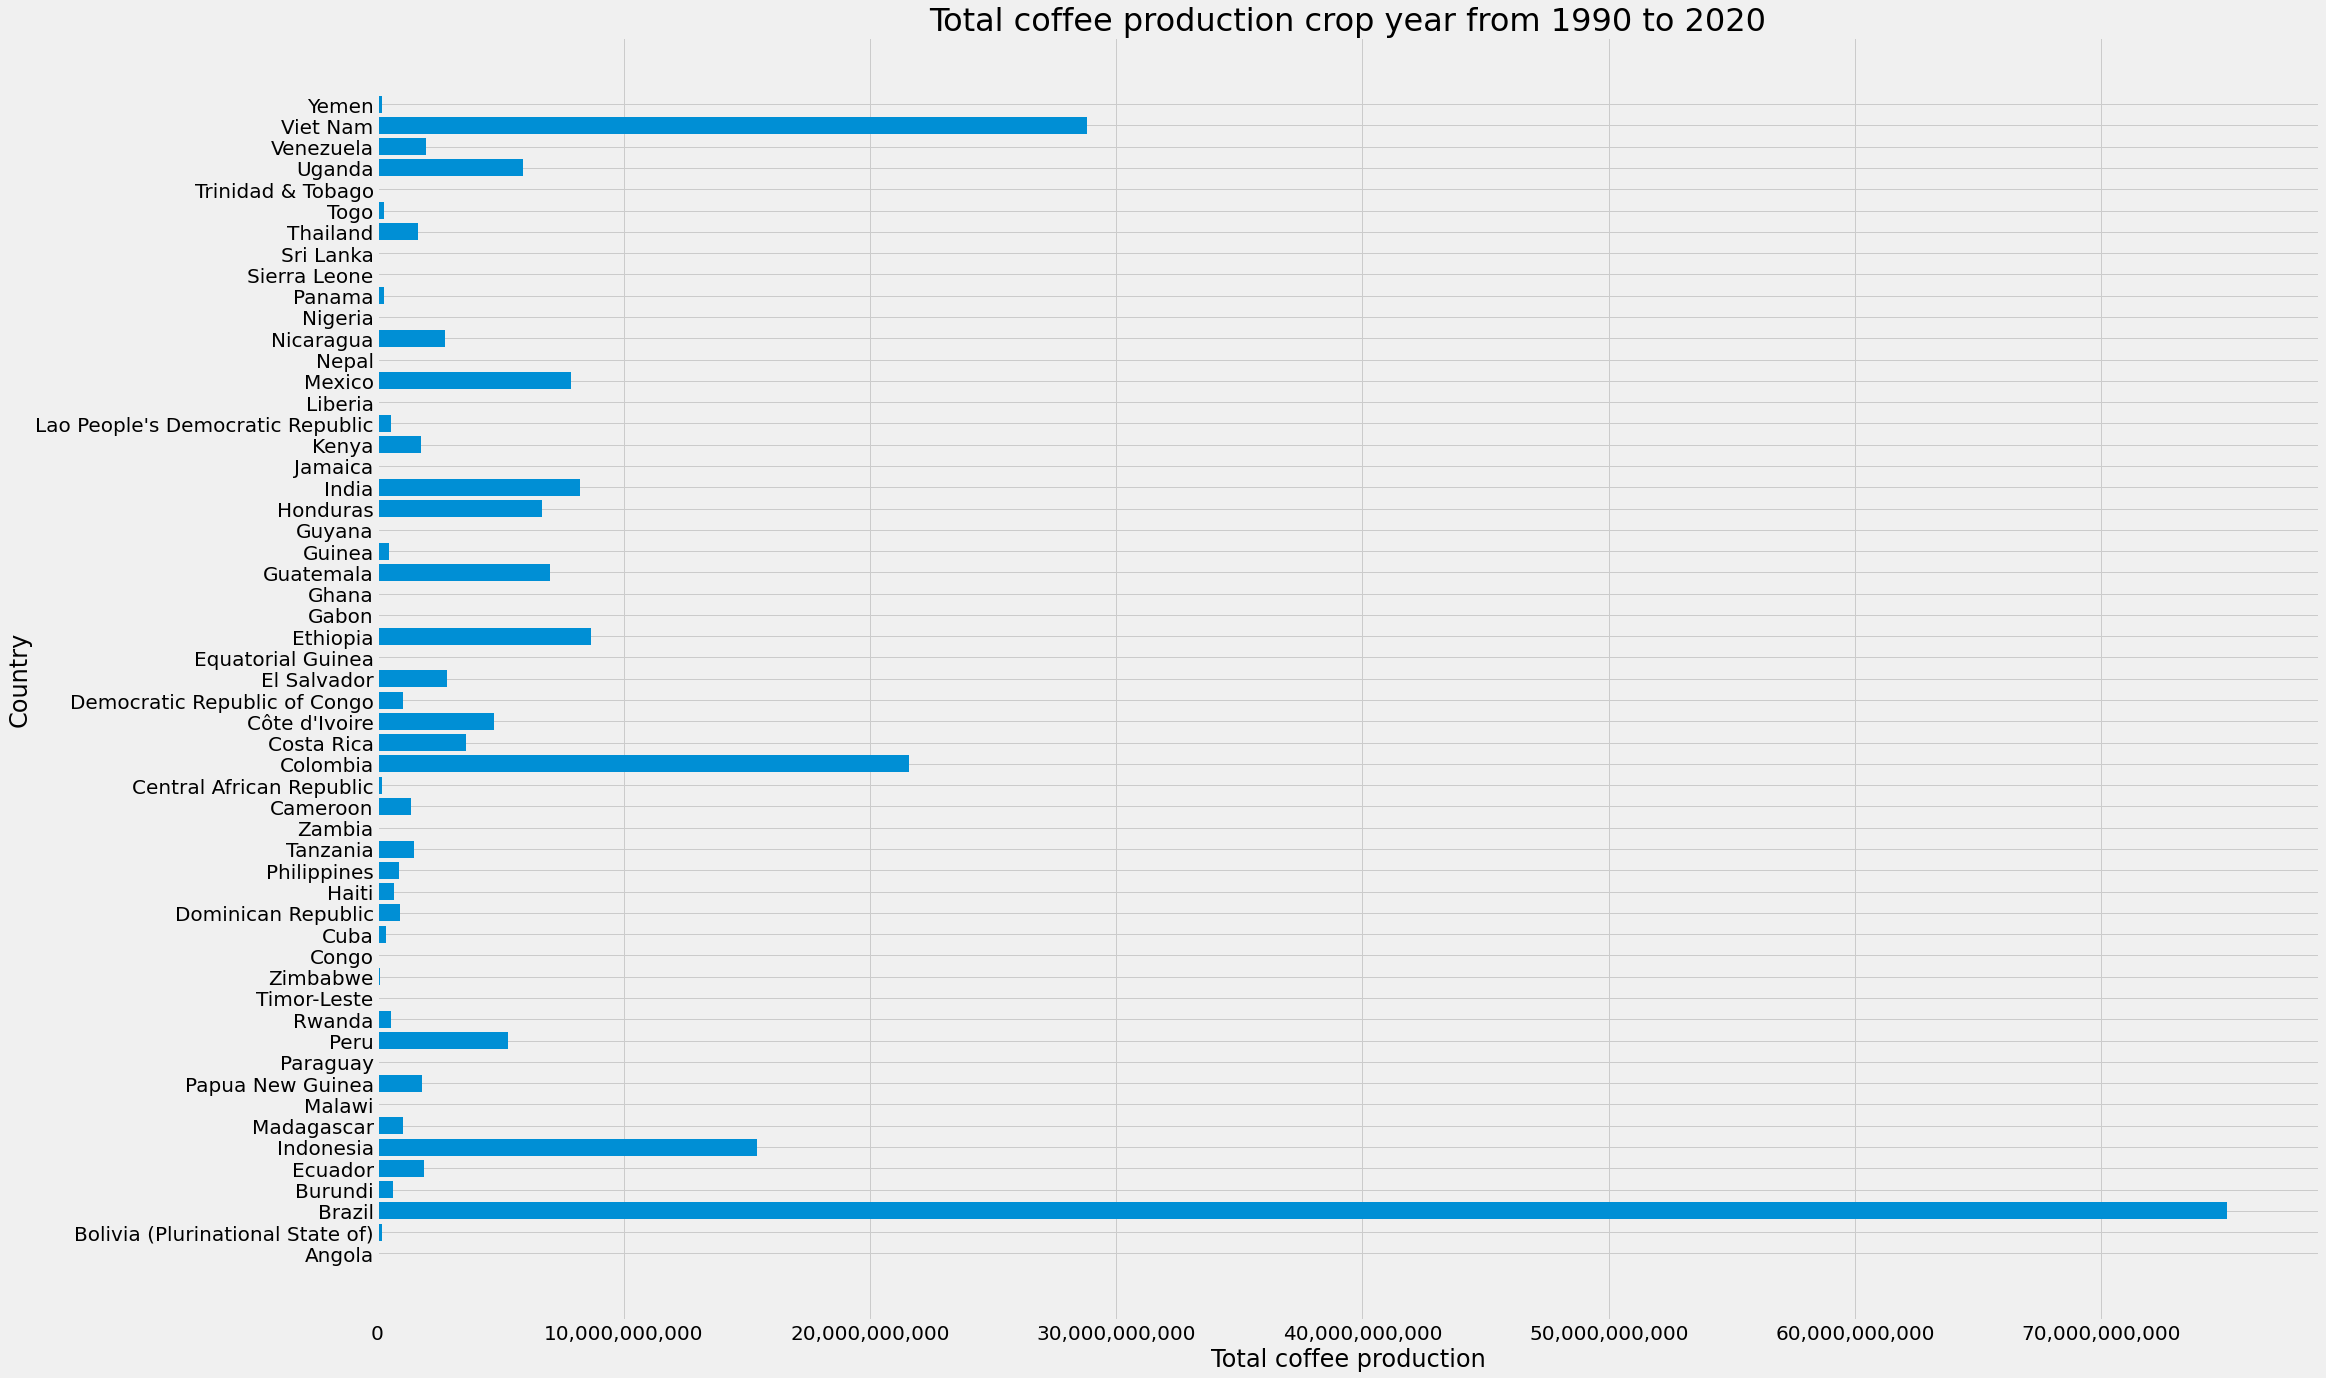

In [22]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(31, 22))

#Horizontal barchart
plt.barh(df_production["Country"], df_production["Total_production"])

# X-axis value size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Label title
plt.xlabel('Total coffee production', fontsize=24) 
plt.ylabel('Country', fontsize=24)

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

#Title label
plt.title("Total coffee production crop year from 1990 to 2020", fontsize=32)

plt.show();

### Exporting DataFrames to excel and csv file

In [63]:
# Export each DataFrame to a single excel file with a separate sheet

def data_to_excel():
    """
    Function for exporting DataFrames to single file with multiple sheet
    
    Returns:
        One excel file with all DataFrames
    """
  
    path = r"C:\Users\dell\Desktop\Coffee_data.xlsx"

    writer = pd.ExcelWriter(path, engine= "xlsxwriter")
    df_production.to_excel(writer, sheet_name = "Production", index=False)
    df_domestic_consumption.to_excel(writer, sheet_name = "Domestic consumption", index=False)
    df_export.to_excel(writer, sheet_name = "Export", index=False)
    df_import.to_excel(writer, sheet_name = "Import", index=False)
    df_re_export.to_excel(writer, sheet_name = "Re_export", index=False)
    df_inventorie.to_excel(writer, sheet_name = "Green_coffee_inventorie", index=False)
    df_import_consumption.to_excel(writer, sheet_name = "Importers_consumption", index=False)

    writer.save()
    writer.close()

data_to_excel()

C:\Users\dell\miniconda3\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [64]:
# Export each DataFrame to a separate csv file

def data_to_csv():
    """
    Function for exporting DataFrames to multiple csv file
    
    Returns:
        Multilple csv file with DataFrames
    """
  
    df_production.to_csv(r"C:\Users\dell\Desktop\Project\Kaggel\Coffee\Coffee_production.csv", index=False)
    df_domestic_consumption.to_csv(r"C:\Users\dell\Desktop\Project\Kaggel\Coffee\Coffee_domestic_consumption.csv", index=False)
    df_export.to_csv(r"C:\Users\dell\Desktop\Project\Kaggel\Coffee\Coffee_export.csv", index=False)
    df_import.to_csv(r"C:\Users\dell\Desktop\Project\Kaggel\Coffee\Coffee_import.csv", index=False)
    df_re_export.to_csv(r"C:\Users\dell\Desktop\Project\Kaggel\Coffee\Coffee_re_export.csv", index=False)
    df_inventorie.to_csv(r"C:\Users\dell\Desktop\Project\Kaggel\Coffee\Coffee_green_coffee_inventorie.csv", index=False)
    df_import_consumption.to_csv(r"C:\Users\dell\Desktop\Project\Kaggel\Coffee\Coffee_importers_consumption.csv", index=False)

data_to_csv()